# ANZ salary prediction


In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [94]:
df=pd.read_excel(r"C:\Users\hrishikesh\Desktop\DATA SCIENCE ALL PROJECTS\20200621 ANZ INTERN\1.original data\ANZ synthesised transaction dataset.xlsx")

In [95]:
df2=df.copy()
df2.shape

(12043, 23)

In [96]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [97]:
df2.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [98]:
df2.drop(columns=['bpay_biller_code','merchant_code','account','merchant_id','extraction','transaction_id','country','currency'],inplace=True)

In [99]:
df2.head()

,status,card_present_flag,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,amount,customer_id,merchant_long_lat,movement
0,authorized,1.0,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,16.25,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,14.19,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,151.23 -33.94,POS,Michael,5.71,2018-08-01,M,38,Sydney,NSW,6.42,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,153.10 -27.66,SALES-POS,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,40.90,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,153.41 -27.95,SALES-POS,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,3.25,CUS-2487424745,153.44 -28.06,debit


In [100]:
len(df2['customer_id'].unique())

100

In [101]:
print(df2.groupby(['customer_id','first_name','age','gender']).groups)

{('CUS-1005756958', 'Stephanie', 53, 'F'): Int64Index([  163,   272,   315,   320,   435,   456,   464,   548,   572,
              598,   690,   765,   801,   830,   841,   931,  1239,  1261,
             1355,  1391,  1469,  1477,  1640,  1717,  1728,  1744,  1958,
             2108,  2125,  2235,  2238,  2349,  2470,  2521,  2530,  2594,
             2639,  2648,  2657,  2773,  2857,  3030,  3053,  3061,  3096,
             3121,  3123,  3170,  3464,  3469,  4326,  4402,  5178,  5321,
             5328,  5346,  5391,  5421,  5566,  6271,  6689,  7127,  7203,
             7650,  8142,  8352,  9072, 10008, 10713, 10951, 11142, 11650,
            11871],
           dtype='int64'), ('CUS-1117979751', 'Lucas', 21, 'M'): Int64Index([   89,   166,   183,   449,   518,   701,   724,   971,  1129,
             1371,  1621,  1871,  2063,  2239,  2240,  2242,  2310,  2321,
             2379,  2386,  2410,  2430,  2446,  2501,  2566,  2621,  2663,
             2935,  3024,  3079,  3101,  3124, 

In [102]:
df3=df2.groupby(['customer_id','first_name','age','gender'])['balance','amount'].agg(np.sum)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [103]:
df3


,,,,balance,amount
customer_id,first_name,age,gender,,
CUS-1005756958,Stephanie,53,F,166137.20,16268.97
CUS-1117979751,Lucas,21,M,982992.90,33984.37
CUS-1140341822,Dustin,28,M,455936.98,17010.60
CUS-1147642491,Robin,34,F,1065875.26,28980.82
CUS-1196156254,Jessica,34,F,5456746.27,36050.72
...,...,...,...,...,...
CUS-72755508,Kimberly,35,F,260858.31,11438.37
CUS-809013380,Kaitlyn,21,F,465855.96,18810.09
CUS-860700529,Jeffrey,30,M,806710.31,18099.88


In [104]:
df3.reset_index(level=[2,3],inplace=True)
df3

,,age,gender,balance,amount
customer_id,first_name,,,,
CUS-1005756958,Stephanie,53,F,166137.20,16268.97
CUS-1117979751,Lucas,21,M,982992.90,33984.37
CUS-1140341822,Dustin,28,M,455936.98,17010.60
CUS-1147642491,Robin,34,F,1065875.26,28980.82
CUS-1196156254,Jessica,34,F,5456746.27,36050.72
...,...,...,...,...,...
CUS-72755508,Kimberly,35,F,260858.31,11438.37
CUS-809013380,Kaitlyn,21,F,465855.96,18810.09
CUS-860700529,Jeffrey,30,M,806710.31,18099.88


In [105]:
salary=pd.DataFrame(df3['balance']+df3['amount'], columns=['Salary'])

In [106]:
df4=pd.concat( [df3,salary],axis=1)

In [107]:
df4

,,age,gender,balance,amount,Salary
customer_id,first_name,,,,,
CUS-1005756958,Stephanie,53,F,166137.20,16268.97,182406.17
CUS-1117979751,Lucas,21,M,982992.90,33984.37,1016977.27
CUS-1140341822,Dustin,28,M,455936.98,17010.60,472947.58
CUS-1147642491,Robin,34,F,1065875.26,28980.82,1094856.08
CUS-1196156254,Jessica,34,F,5456746.27,36050.72,5492796.99
...,...,...,...,...,...,...
CUS-72755508,Kimberly,35,F,260858.31,11438.37,272296.68
CUS-809013380,Kaitlyn,21,F,465855.96,18810.09,484666.05
CUS-860700529,Jeffrey,30,M,806710.31,18099.88,824810.19


In [108]:
a=pd.get_dummies(df4['gender'])
df4=pd.concat([df4,a],axis=1)
df4.drop(columns=['gender','balance','amount'],inplace=True)
df4

,,age,Salary,F,M
customer_id,first_name,,,,
CUS-1005756958,Stephanie,53,182406.17,1,0
CUS-1117979751,Lucas,21,1016977.27,0,1
CUS-1140341822,Dustin,28,472947.58,0,1
CUS-1147642491,Robin,34,1094856.08,1,0
CUS-1196156254,Jessica,34,5492796.99,1,0
...,...,...,...,...,...
CUS-72755508,Kimberly,35,272296.68,1,0
CUS-809013380,Kaitlyn,21,484666.05,1,0
CUS-860700529,Jeffrey,30,824810.19,0,1


In [109]:
df_reg1=df4.copy()
df_reg2=df4.copy()

In [110]:
df_reg1=df_reg1.drop(columns=['age','M'])
df_reg2=df_reg2.drop(columns=['F','M'])


In [111]:
df_reg1

,,Salary,F
customer_id,first_name,,
CUS-1005756958,Stephanie,182406.17,1
CUS-1117979751,Lucas,1016977.27,0
CUS-1140341822,Dustin,472947.58,0
CUS-1147642491,Robin,1094856.08,1
CUS-1196156254,Jessica,5492796.99,1
...,...,...,...
CUS-72755508,Kimberly,272296.68,1
CUS-809013380,Kaitlyn,484666.05,1
CUS-860700529,Jeffrey,824810.19,0


In [112]:
df_reg2

,,age,Salary
customer_id,first_name,,
CUS-1005756958,Stephanie,53,182406.17
CUS-1117979751,Lucas,21,1016977.27
CUS-1140341822,Dustin,28,472947.58
CUS-1147642491,Robin,34,1094856.08
CUS-1196156254,Jessica,34,5492796.99
...,...,...,...
CUS-72755508,Kimberly,35,272296.68
CUS-809013380,Kaitlyn,21,484666.05
CUS-860700529,Jeffrey,30,824810.19


In [113]:
#df_reg2[df_reg2['Salary'] == df_reg2['Salary'].max()].index
#df_reg2.drop(index=df_reg2[df_reg2['Salary'] == df_reg2['Salary'].max()].index,axis=0,inplace=True)

In [114]:
#df_reg2[df_reg2['Salary'] == df_reg2['Salary'].max()].index
#df_reg2.drop(index=df_reg2[df_reg2['Salary'] == df_reg2['Salary'].max()].index,axis=0,inplace=True)

In [115]:
x1=df_reg1.iloc[:,1].values
y1=df_reg1.iloc[:,0].values
x2=df_reg2.iloc[:,0].values
y2=df_reg2.iloc[:,1].values

x1=x1.reshape(-1,1)
x2=x2.reshape(-1,1)
y1=y1.reshape(-1,1)
y2=y2.reshape(-1,1)

In [116]:
from sklearn.model_selection import train_test_split
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)
x2train, x2test, y2train, y2test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [117]:
from sklearn.linear_model import LinearRegression
rg1 = LinearRegression()
rg1.fit(x1train, y1train)
rg2=LinearRegression()
rg2.fit(x2train, y2train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
y_pred1 = rg1.predict(x1train)
y_pred2 = rg2.predict(x2train)
y_pred3=rg2.predict(x2test)

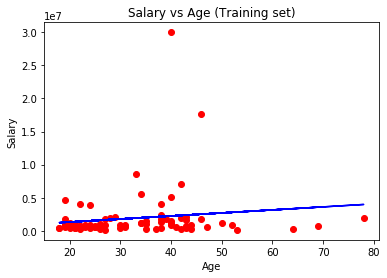

In [119]:
plt.scatter(x2train, y2train, color = 'red')
plt.plot(x2train, y_pred2, color = 'blue')
plt.title('Salary vs Age (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

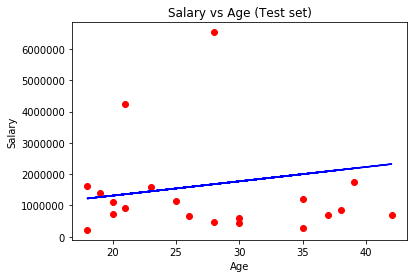

In [121]:
plt.scatter(x2test, y2test, color = 'red')
plt.plot(x2test, y_pred3, color = 'blue')
plt.title('Salary vs Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [132]:
from sklearn.metrics import r2_score

r2_score(y2test,y_pred3)

-0.16308604715998087

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor(random_state = 0)
dt.fit(x2train, y2train)
ypred_dt=dt.predict(y2test)

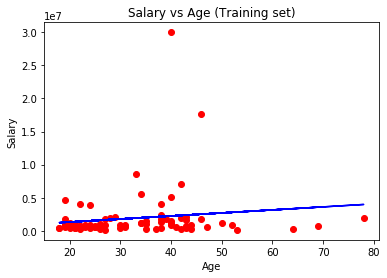

In [127]:
plt.scatter(x2train, y2train, color = 'red')
plt.plot(x2train, y_pred2, color = 'blue')
plt.title('Salary vs Age (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

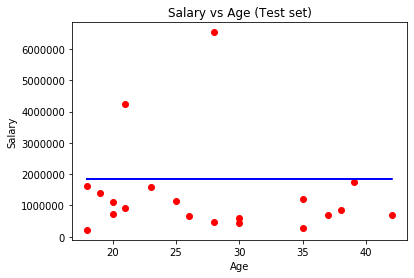

In [129]:
plt.scatter(x2test, y2test, color = 'red')
plt.plot(x2test, ypred_dt, color = 'blue')
plt.title('Salary vs Age (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

In [131]:
from sklearn.metrics import r2_score

r2_score(y2test,ypred_dt)

-0.11630466426724384